In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, acovf

## Problem 1

Consider a *Random Walk* defined by: 

$X_t = b + X_{t-1} + Z_t, Z_t \overset{iid}{\sim} WN(0,1)$

$X_0 = 0$

(a) Show that this process can be rewritten as the cumulative sum of white noise terms, i.e., $X_t = bt + \sum_{i=1}^t Z_t$

$\begin{align} 
X_t &= b + X_{t-1} + Z_t \\ 
&= 2b + X_{t-2} + Z_t + Z_{t-1} \\ 
&= 3b + X_{t-3} + X_t + Z_{t-2} + Z_{t-3} \\
&\vdots
\\
X_t &= bt + X_0 + \sum_{i=1}^t Z_t = bt + \sum_{i=1}^t Z_t
\end{align}$

(b) Simulate 200 observations for each of three random walks: 
    (1) b = 0.6; 
    (2) b = −0.4; and 
    (3) b = 0. 
Plot all realizations on the same plot using different colors.

In [2]:
np.random.seed(12)

# simulating random walks
n = 200
Z = np.random.normal(0,1,n)
t = np.arange(n)
b = [0.7,-0.6,0]

X = np.zeros([3,n])

# compute random walks for all values of b
for index, value in enumerate(b):
    X[index,] = value*t + np.cumsum(Z)

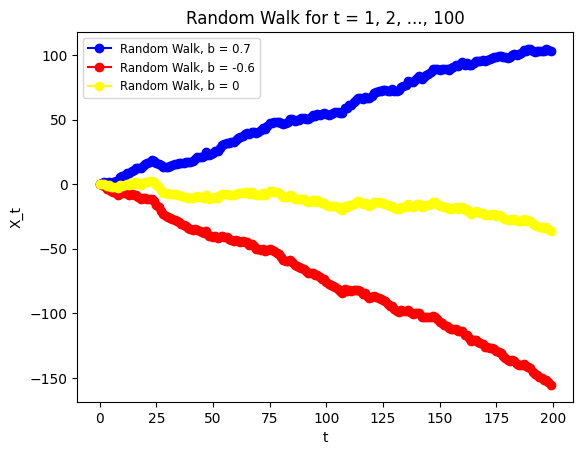

In [3]:
# plotting RWs with different colors 
colors = ['blue','red','yellow']

for index, value in enumerate(colors):
    plt.plot(X[index,], marker = 'o', color = value, label = f'Random Walk, b = {b[index]}')
plt.xlabel('t')
plt.ylabel('X_t')
plt.title('Random Walk for t = 1, 2, ..., 100')
plt.legend(loc='upper left', fontsize='small')
plt.show()

(c) Observe the three trajectories, describe them, do they appear weak stationary?

Looking at the trajectories, the only series that appears weakly stationary is the random walk with b = 0. The mean for the non-zero random walks changes as t passes but the random walk with no drift doesn't share that appearance. 

(d) Prove that a Random Walk is NOT weakly stationary when b = 0.

$\text{Var}(X_t) = \text{Var}(bt + \sum_{i=1}^t Z_t) = \sum_{i=1}^t \text{Var}(Z_t) = t$

The variance of the random walk is dependent on time, therefore the random walk with no drift term is NOT weakly stationary.

(e) Plot the `acf` of the Random Walk with b = 0.

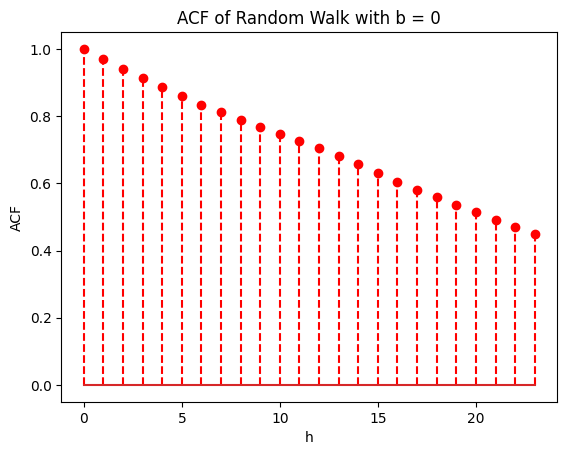

In [4]:
no_drift_acf = acf(X[2,]) # X[2,] corresponds to the RW with b = 0

# plotting the acf
plt.stem(no_drift_acf, linefmt = 'r--')
plt.title("ACF of Random Walk with b = 0")
plt.xlabel("h")
plt.ylabel("ACF")
plt.show()

## Problem 2

Consider both AR(2) and MA(2) processes given by:

$X_t = \phi_1X_{t-1} + \phi_2X_{t-2} + W_t, W_t \overset{iid}{\sim} N(0,1)$ 

$Y_t = Z_t + \theta_1Z_{t-1} + \theta_2Z_{t-2}, W_t \overset{iid}{\sim} N(0,1)$

(a) Recall that for an AR(1) process, we merely required that $|\phi| < 1$ for causality. What is the similar condition for an AR(2) process? (Hint: An AR process is causal if and only if the roots of the AR polynomial lie outside the unit circle)

Manipulating the AR(2) model, we get the backwards shift representation of the model:

$Z_t = \theta(B)X_t, \text{ where } \theta(z) = 1 - \phi_1z - \phi_2z^2$

Solving for the roots of the polynomial yields, and requiring the roots of the polynomial to be outside of the unit circle yields the inequality:

$\left|\frac{\phi_1 \pm \sqrt{\phi_1^2 + 4\phi_2}}{-2\phi_2}\right| > 1 $

Since the roots of $\theta(z)$ could be either real values or a complex conjugate pair, we'll denote the roots of the quadratic $z_1, z_2$. Thus $\theta(z)$ can be written as:

$\theta(z) = (1 - z_1^{-1}z)(1 - z_2^{-1}z)$ 

This means the original AR(2) model can be written as:

$Z_t = (1 - z_1^{-1}B)(1 - z_2^{-1}B)X_t$

From this we can infer: $\phi_1 = z_1^{-1} + z_2^{-1}, \phi_2 = -(z_1z_2)^{-1}$. Since $|z_1| > 1, |z_2| > 1$, we can conclude:

$|z_1^{-1}| < 1, |z_2^{-1}| < 1 \implies |-(z_1z_2)^{-1}| = |\phi_2| < 1$

For the last two requirements, we have to manipulate the characteristic polynomial. Letting $k = z^{-1}$, we can write the characteristic polynomial as:

$\theta(z) = z^2(k^2 - \phi_1k - \phi_2)$

Solving for the roots for k with the assumption $|z| > 1$ yields the inequality:

$\left|\frac{\phi_1 \pm \sqrt{\phi_1^2 + 4\phi_2}}{2}\right| < 1$

Manipulating the inequality yields the inequalities:

$-2 < \phi_1 - \sqrt{\phi_1^2 + 4\phi_2} \\ \phi_1 + \sqrt{\phi_1^2 + 4\phi_2} < 2$

Solving the inequalities results in two more conditions:

$\phi_1 + \phi_2 < 1 \\ \phi_2 - \phi_1 < 1$

Thus, the AR(2) model is causal for the three conditions:
1. $|\phi_2| < 1$
2. $\phi_1 + \phi_2 < 1$
3. $\phi_2 - \phi_1 < 1$

(b) Let $\phi_1$ = 0.35, $\phi_2$ = 0.45. Simulate the AR(2) process for 200 samples and plot it. Observe the path, does is look like stationary?

In [9]:
np.random.seed(578)

# initiate parameters
n = 200
phi = [0.35,0.45]

# simulate white noise
W = np.random.normal(0,1,n)

# values for X - AR(2)
# we assume the initial conditions X_(-1) = X_0 = 0
X = np.zeros_like(W)
X[0] = W[0] # X_1 = W_1
X[1] = phi[0]*X[0] + W[1] # X_2 = phi_1 * X_1 + W_2
X[2:] = phi[0]*X[1:-1] + phi[1]*X[0:-2] + W[2:] # values for X_3, ..., X_200

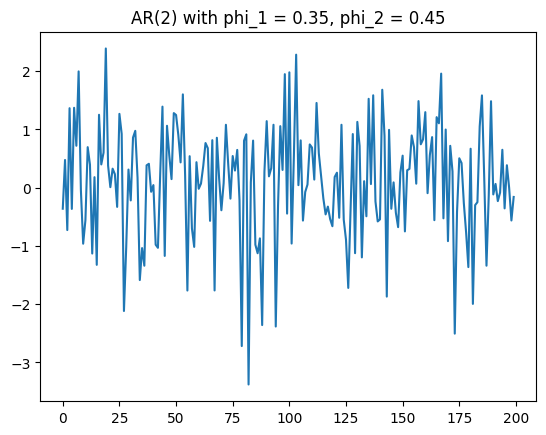

In [10]:
# plotting AR(2)
plt.plot(X)
plt.title("AR(2) with phi_1 = 0.35, phi_2 = 0.45")
plt.show()

Looking at the path, it appears that the mean doesn't change with time, so the model looks stationary.

(c) Take the sample ACF $\hat{\rho}_X(h)$ for h = 1,2,...,20. Remember the shape (exponential decay) of the sample ACF for a AR process.

In [11]:
# used to check acf() calculated similar values
# calculating sample acf
X_sample_mean = np.mean(X)

# calculating sample acvfs
X_num_acvf = np.zeros(21)

for h in range(21):
    X_num_acvf[h] = (1/n) * np.sum((X[0:n-h] - X_sample_mean)*(X[h:n] - X_sample_mean))

X_num_acf = X_num_acvf / X_num_acvf[0]

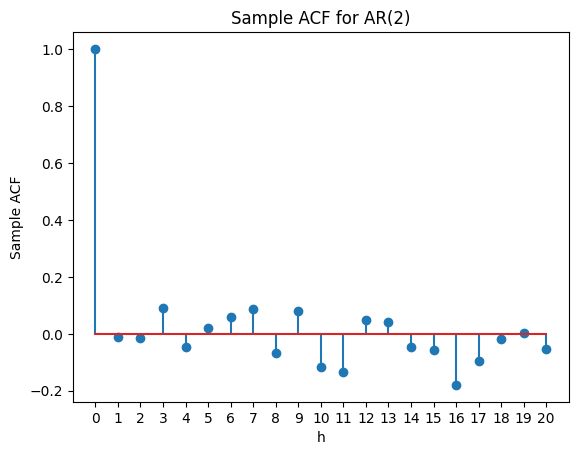

In [12]:
# calculating sample acf
X_acf = acf(X, nlags = 20)

plt.stem(X_acf)
plt.title("Sample ACF for AR(2)")
plt.ylabel("Sample ACF")
plt.xlabel("h")
plt.xticks(range(21))
plt.show()

(d) Simulate and plot the MA(2) process (with $\theta_1$ = 0.45 and $\theta_2$ = 0.55) for 200 observations. Does it look like a stationary process?

In [4]:
# initiate parameters
n = 200
theta = [0.45,0.55]

# create white noise for MA(2)
Z = np.random.normal(0,1,n)

# calculate values for MA(2)
Y = np.zeros_like(Z)
Y[0] = Z[0] # Y_1 = Z_1
Y[1] = Z[1] + theta[0]*Z[0] # Y_2 = Z_2 + theta1*Z_1
Y[2:] = Z[2:] + theta[0]*Z[1:-1] + theta[1]*Z[:-2] # Y_3, ..., Y_200

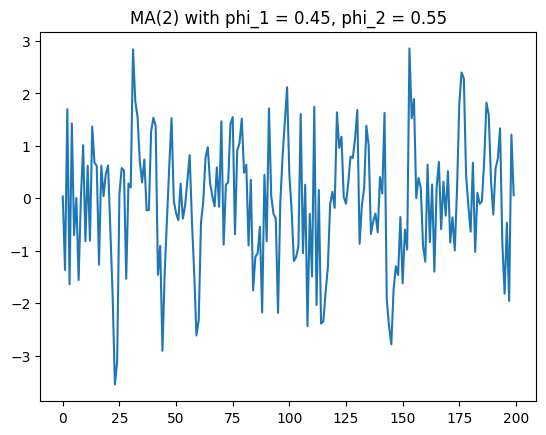

In [5]:
# plotting MA(2)
plt.plot(Y)
plt.title("MA(2) with phi_1 = 0.45, phi_2 = 0.55")
plt.show()

Nothing in the plot suggests that the model isn't stationary. 

(e) On one plot, plot both the theoretical $\rho_Y(h)$ and sample ACF $\hat{\rho}_Y(h)$, for h = 0,1,...,20.

In [16]:
# used to check acf() calculated similar values
# numerical acf
Y_sample_mean = np.mean(Y)

# calculating sample acvfs
Y_num_acvf = np.zeros(21)

for h in range(21):
    Y_num_acvf[h] = (1/n) * np.sum((Y[0:n-h] - Y_sample_mean)*(Y[h:n] - Y_sample_mean))

Y_num_acf = Y_num_acvf / Y_num_acvf[0]

$\rho_Y(0) = 1 \\ \rho_Y(1) = \frac{0.45 + (0.45)(0.55)}{1 + 0.45^2 + 0.55^2} = 0.463 \\ \rho_Y(2) = \frac{0.55}{1 + 0.45^2 + 0.55^2} = 0.365$

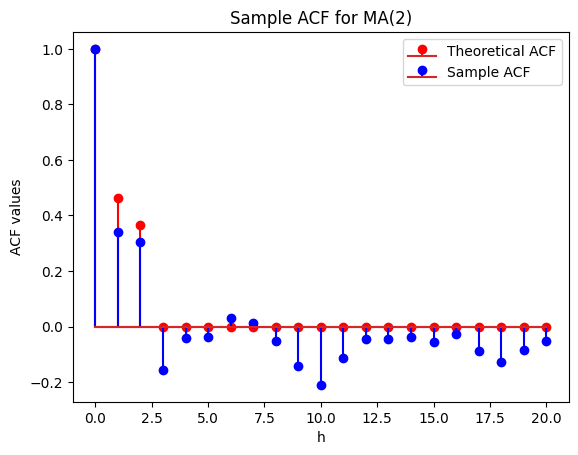

In [9]:
# sample acf values
Y_acf = acf(Y, nlags = 20)

# theoretical acf values
Y_theo_acf = np.zeros_like(Y_acf)
Y_theo_acf[0] = 1
Y_theo_acf[1] = 0.463
Y_theo_acf[2] = 0.365

# plotting sample vs theoretical
plt.stem(Y_theo_acf, linefmt = 'red', label = "Theoretical ACF")
plt.stem(Y_acf, linefmt = 'blue', label = "Sample ACF")
plt.title("Sample ACF for MA(2)")
plt.ylabel("ACF values")
plt.xlabel("h")
plt.legend()
plt.show()

(f) Compare with the sample ACF for AR(2) and MA(2), what do you find?

The sample acf values for the MA(2) model are significantly big for h = 1 and h = 2, which reinforces the idea that the model is MA(2). The sample acf values for the AR(2) model drop off kind of quickly, but you can still see the exponential decay that's expected in the model. The models have similar sample correlation values for particular lag values, but for the most part they accurately reflect the theoretical acfs for their respective models. 